# Practical 1: Unsupervised learning and AI Peer-Programming
Our first lecture introduced us to the different types of machine learning, their use cases, and underlying data structures. Given that the course focuses on supervised learning, we use this introductory practice session and shed, at least, some light on *unsupervised learning*.

Further, we use this notebook to illustrate the capabilities of Generative AI (GenAI). More specifically, we examine how GenAI (e.g., ChatGPT), can help us develop Python codes. To that end, the notebook provides a set of prompts to generate Python codes. Your task is to try out these prompts using an AI of your choice and experiment with the generated programming codes. 

We suggest you begin with the prepared prompts. Afterwards, you are most welcome to make adjustments and examine how changes in your prompts change the generated codes; and by extension the effectiveness of the GenAI support. 

**Disclaimer** Prompts were tested with different versions of ChatGTP and should work reasonably well. That said, there is no guarantee that the provided prompts lead an AI to produce ready-to-use code. As said, one learning goal of this session is to *study how GenAI can help us*. We should not expect it to do all the work.

Let's move on with the first prompt.

## Prompt 1: Cluster analysis
Try out the following prompt using an AI of your choice (e.g., ChatGPT):



#### Copy the generated codes into the below code cell and execute it:

Generating synthetic data with 4 clusters...
Cluster separation (std): 1.0
Generated 300 data points with 2 features

Running K-Means clustering with k=4...
Clustering completed!
Adjusted Rand Index (ARI): 0.991
  - ARI = 1.0: Perfect match with true labels
  - ARI = 0.0: Random labeling
Silhouette Score: 0.792
  - Range: [-1, 1], higher is better


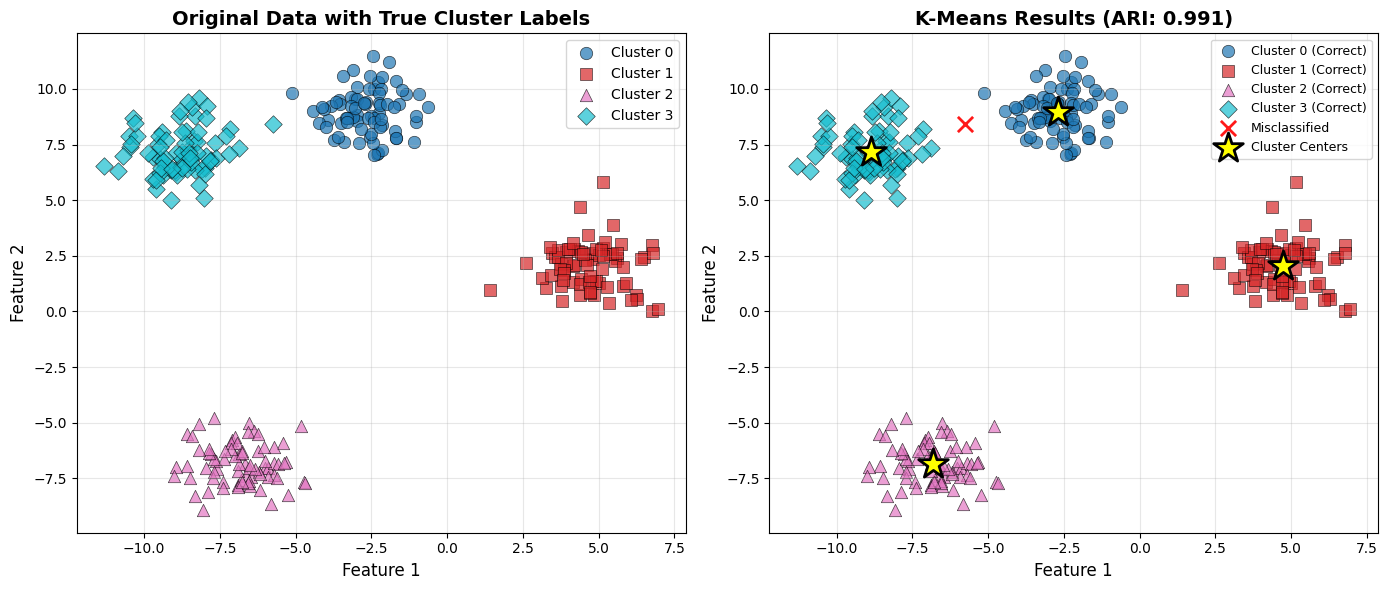


CLUSTERING RESULTS SUMMARY
Total data points: 300
Correctly clustered: 299 (99.7%)
Misclassified: 1 (0.3%)

Tip: Adjust CLUSTER_STD parameter to change difficulty:
  - Current value: 1.0
  - Increase for easier clustering (more separation)
  - Decrease for harder clustering (more overlap)


In [6]:
# Copy and run generated codes here

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# ============================================================================
# CONFIGURATION: Adjust these parameters to change clustering difficulty
# ============================================================================

# Number of clusters in the synthetic data
N_CLUSTERS = 4

# Number of data points to generate
N_SAMPLES = 300

# Cluster separation: higher = easier clustering (typical range: 0.5 to 3.0)
# - Values > 2.0: Easy (well-separated clusters)
# - Values 1.0-2.0: Moderate (some overlap)
# - Values < 1.0: Hard (significant overlap)
CLUSTER_STD = 1.0

# Random seed for reproducibility
RANDOM_STATE = 42

# ============================================================================
# STEP 1: Generate Synthetic Data
# ============================================================================

print(f"Generating synthetic data with {N_CLUSTERS} clusters...")
print(f"Cluster separation (std): {CLUSTER_STD}")

# Generate synthetic 2D data with distinct clusters
X, y_true = make_blobs(
    n_samples=N_SAMPLES,
    n_features=2,
    centers=N_CLUSTERS,
    cluster_std=CLUSTER_STD,
    random_state=RANDOM_STATE
)

print(f"Generated {N_SAMPLES} data points with 2 features")

# ============================================================================
# STEP 2: Visualize Original Data with True Cluster Labels
# ============================================================================

# Define marker styles for different clusters
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
colors = plt.cm.tab10(np.linspace(0, 1, N_CLUSTERS))

plt.figure(figsize=(14, 6))

# Plot 1: Original data with true cluster labels
plt.subplot(1, 2, 1)
for i in range(N_CLUSTERS):
    mask = y_true == i
    plt.scatter(
        X[mask, 0], 
        X[mask, 1], 
        marker=markers[i % len(markers)],
        s=80,
        c=[colors[i]],
        label=f'Cluster {i}',
        alpha=0.7,
        edgecolors='black',
        linewidth=0.5
    )

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Original Data with True Cluster Labels', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# ============================================================================
# STEP 3: Apply K-Means Clustering Algorithm
# ============================================================================

print(f"\nRunning K-Means clustering with k={N_CLUSTERS}...")

# Initialize and fit K-Means clustering
kmeans = KMeans(
    n_clusters=N_CLUSTERS,
    random_state=RANDOM_STATE,
    n_init=10  # Number of times to run with different initializations
)

# Predict cluster labels
y_pred = kmeans.fit_predict(X)

# Get cluster centers
centers = kmeans.cluster_centers_

# Calculate clustering quality metrics
ari_score = adjusted_rand_score(y_true, y_pred)
silhouette_avg = silhouette_score(X, y_pred)

print(f"Clustering completed!")
print(f"Adjusted Rand Index (ARI): {ari_score:.3f}")
print(f"  - ARI = 1.0: Perfect match with true labels")
print(f"  - ARI = 0.0: Random labeling")
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"  - Range: [-1, 1], higher is better")

# ============================================================================
# STEP 4: Visualize Clustering Results with Comparison
# ============================================================================

# Plot 2: Clustering results with comparison to true labels
plt.subplot(1, 2, 2)

# For each data point, determine if it was correctly clustered
# We need to find the best mapping between predicted and true labels
from scipy.optimize import linear_sum_assignment

# Create a confusion matrix
confusion_matrix = np.zeros((N_CLUSTERS, N_CLUSTERS))
for true_label in range(N_CLUSTERS):
    for pred_label in range(N_CLUSTERS):
        confusion_matrix[true_label, pred_label] = np.sum(
            (y_true == true_label) & (y_pred == pred_label)
        )

# Find optimal label mapping using Hungarian algorithm
row_ind, col_ind = linear_sum_assignment(-confusion_matrix)
label_mapping = {col_ind[i]: row_ind[i] for i in range(len(row_ind))}

# Remap predicted labels to match true labels as closely as possible
y_pred_mapped = np.array([label_mapping[label] for label in y_pred])

# Determine correct vs incorrect assignments
correct_mask = y_true == y_pred_mapped
incorrect_mask = ~correct_mask

# Plot correctly classified points
for i in range(N_CLUSTERS):
    mask = (y_pred_mapped == i) & correct_mask
    plt.scatter(
        X[mask, 0], 
        X[mask, 1], 
        marker=markers[i % len(markers)],
        s=80,
        c=[colors[i]],
        label=f'Cluster {i} (Correct)',
        alpha=0.7,
        edgecolors='black',
        linewidth=0.5
    )

# Plot misclassified points with red border
if np.any(incorrect_mask):
    plt.scatter(
        X[incorrect_mask, 0], 
        X[incorrect_mask, 1], 
        marker='x',
        s=120,
        c='red',
        label='Misclassified',
        alpha=0.9,
        linewidth=2
    )

# Plot cluster centers
plt.scatter(
    centers[:, 0], 
    centers[:, 1],
    marker='*',
    s=500,
    c='yellow',
    edgecolors='black',
    linewidth=2,
    label='Cluster Centers',
    zorder=10
)

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title(f'K-Means Results (ARI: {ari_score:.3f})', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=9)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# SUMMARY STATISTICS
# ============================================================================

n_correct = np.sum(correct_mask)
n_incorrect = np.sum(incorrect_mask)
accuracy = n_correct / len(y_true) * 100

print(f"\n{'='*60}")
print(f"CLUSTERING RESULTS SUMMARY")
print(f"{'='*60}")
print(f"Total data points: {len(y_true)}")
print(f"Correctly clustered: {n_correct} ({accuracy:.1f}%)")
print(f"Misclassified: {n_incorrect} ({100-accuracy:.1f}%)")
print(f"{'='*60}")
print(f"\nTip: Adjust CLUSTER_STD parameter to change difficulty:")
print(f"  - Current value: {CLUSTER_STD}")
print(f"  - Increase for easier clustering (more separation)")
print(f"  - Decrease for harder clustering (more overlap)")

#### Code inspection
As said, the above prompt should work reasonably well, meaning that, at this point, you should have codes for a clustering demo and the corresponding results in front of you.

 The above assumed, note how our prompt explicitly asked for a means to control the difficulty of the clustering task. Review the generated codes and find out how you can achieve this. Adjust the codes to increase the clustering task complexity and rerun them to verify everything worked out as expected. Feel free to repeat this exercise multiple time with various levels of task complexity. This should give you a good understanding of when the clustering algorithm works well and when it fails.

#### Code revision
It is safe to assume that the generated codes were not perfect. Did you spot any issue you think warrants improvement? 
Go back to your AI and try to make it generate better code. You can either revise the prompt or continue the 'discussion' with the AI and ask it to make improvements.  

In case you did not spot any issue, you could feed the generated codes back into the AI and task it to suggest improvements. To do that, you could start your prompt like so:

In [7]:
# Space to copy improved AI-generated codes to demonstrate clustering


## Prompt 2: Dimensionality reduction
Although not stressed in today's lecture, clustering is not the only form of unsupervised learning. Another form involves dimensionality reduction. Receiving a tabular dataset with $m$ columns, a dimensionality reduction algorithm produces a new dataset with $k<<m$ columns (i.e., features) in such a way that the *structur* in the original high-dimensional data is sustained to the largest degree possible.

The goal of dimensionality reduction this approach can be visualization. Reducing a *many-column-table* to only two features facilitates visualizing the data using a scatter plot. 

Popular methods toward dimensionality reduction include Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE), and UMAP.  

With our second prepared prompt, we try to generate code that demonstrates how to perform dimensionality reduction in Python.

**Suggested prompt:**

In [8]:
# Copy and execute generated code here:



## Programming task:
If the prepared prompt worked as intended, your synthetic high-dimensional data set should comprise `num_clusters` clusters. The 2D projection of the data should also show these clusters. Let's see whether we can also find these clusters in the original, high-dimensional data using a clustering algorithm.

Specifically, drawing on the code generated in response to our first prompt, your task is to write a Python script that clusters your high-dimensional data set. 

Quickly check that *kMeans* really clustered all data points into `num_clusters` clusters by applying the `Numpy` function `unique()` to the *predicted labels* from *kMeans*. For example, your code might look as follows:
```Python
# Code to apply KMeans algorithm to the high-dimensional data set
kmeans = ... # -> for you to complete
predicted_labels = kmeans.fit_predict(data)
print(np.unique(predicted_labels))
```

We suggest you try to solve this task without the help of Gen-AI. 

In [9]:
# Your solution goes here

**Additional task for the experts:** try to find a way to verify that the algorithm found the correct number of clusters. 
While the above code is enough to solve the task, examining the resulting clustering is suitable is more challenging. 

Since we use synthetic data, an intuitive approach is to compare the true cluster membership (i.e., the variable `labels` that the `make_blobs` function returns) to the output of the `fit_predict` method. Unfortunately, this does not work because of the **arbitrary cluster indexing** in both `make_blobs` and K-means. While `make_blobs` assigns indices to clusters when generating synthetic data, K-means does not know these labels and assigns its own arbitrary indices based on how it organizes clusters during training.

This discrepancy means that even if the clustering is perfectly accurate in terms of data point grouping, the indices of clusters in `make_blobs` and K-means may not align (e.g., what `make_blobs` labels as cluster `0`, K-means might label as cluster `2`). 

To align indices for accurate comparison, we can use the **Hungarian method** to optimally map K-means cluster indices to the true labels, allowing us to objectively assess clustering performance without being affected by differing label assignments.

Using web-search and, if you like, GenAI, try to align the K-means-based cluster indices and those of `make_blobs()`. Afterwards, compute the fraction of correct cluster assignments to assess K-means. 

If you can get this pipeline to work, the next task would be to gradually increase the level of data complexity and to verify that the number of cluster assignment errors increases when the clustering task becomes more difficult.